## Ejercicio de codificación #0803

### 1. Red Neuronal Convolucional con Keras (imágenes en escala de grises):

In [1]:
# Instalar si es necesario una única vez
# !pip install keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings                   
from sklearn.model_selection import train_test_split
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                  # Desactivar las advertencias.
%matplotlib inline

Using TensorFlow backend.


#### 1.1. Leer los datos:

In [3]:
# Recuperar los datos.
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

In [4]:
# Ver las formas.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (60000, 28, 28)
Training data y shape: (60000,)
--------------------------------------------------
Test data X shape: (10000, 28, 28)
Test data y shape: (10000,)
--------------------------------------------------


#### 1.2. Visualizar los datos:

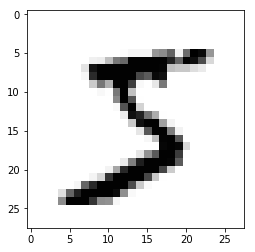

In [5]:
i_image = 0                                   # Puede cambiar esto a voluntad.
plt.imshow(X_train[i_image,:,:],cmap="Greys")
plt.show()

#### 1.3. Preparar los datos:

In [6]:
# Escalar.
X_train = X_train/255                   
X_test = X_test/255                        

In [7]:
# Reorganizar.
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [8]:
# Codificación One-hot.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,10)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

#### 1.4. Definir un modelo CNN :

In [9]:
drop_prob = 0.5
my_model = Sequential()
# 1a convolución + agrupamiento
my_model.add(Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(5,5),padding='same',activation="relu"))        # 1 channel of grayscale.
my_model.add(MaxPooling2D(pool_size=2))
# 2a convolución + agrupamiento
my_model.add(Conv2D(filters=64,kernel_size=(5,5), padding='same',activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))
# Capa plana completamente conectada.
my_model.add(Flatten())
my_model.add(Dense(units = 1024, activation="relu"))
# Apliar dropout.
my_model.add(Dropout(rate=drop_prob))
# Capa de salida.
my_model.add(Dense(units = 10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# Resumen.
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

#### 1.5. Definir los hiperparámetros y el optimizador:

In [11]:
# Hiperparámetros.
n_epochs = 10
batch_size = 200
learn_rate = 0.001

In [12]:
# Definir el optimizador y complilar.
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#### 1.6. Entrenar el modelo y visualizar la historia:

In [13]:
# Entrenar el modelo.
# verbose = 0 significa sin salida. verbose = 1 para ver las épocas.
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 70s 1ms/step - loss: 0.2095 - acc: 0.9350 - val_loss: 0.0627 - val_acc: 0.9800
Epoch 2/10
48000/48000 [==============================] - 66s 1ms/step - loss: 0.0565 - acc: 0.9826 - val_loss: 0.0477 - val_acc: 0.9858
Epoch 3/10
48000/48000 [==============================] - 71s 1ms/step - loss: 0.0388 - acc: 0.9876 - val_loss: 0.0365 - val_acc: 0.9888
Epoch 4/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.0285 - acc: 0.9905 - val_loss: 0.0297 - val_acc: 0.9911
Epoch 5/10
48000/48000 [==============================] - 67s 1ms/step - loss: 0.0234 - acc: 0.9927 - val_loss: 0.0290 - val_acc: 0.9911
Epoch 6/10
48000/48000 [==============================] - 61s 1ms/step - loss: 0.0181 - acc: 0.9939 - val_loss: 0.0317 - val_acc: 0.9911
Epoch 7/10
48000/48000 [==============================] - 58s 1ms/step - loss: 0

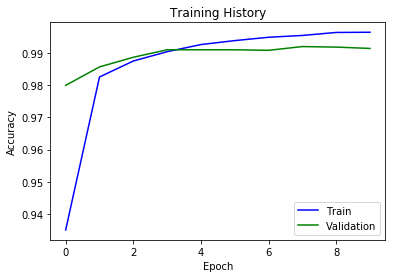

In [15]:
# Visualizar el historial de entrenamiento.
n_skip = 0                 # Omitir los primeros pasos.
plt.plot(my_summary.history['acc'][n_skip:], c="b")
plt.plot(my_summary.history['val_acc'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### 1.7. Pruebas: 

In [16]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.992
